In [2]:
from google.cloud import bigquery
from google.cloud.bigquery import magics
%load_ext bigquery_magics

data_set = "testing_set"
project_name = "emerald-entity-468916-f9"

job_config = bigquery.QueryJobConfig(default_dataset = f"{project_name}.{data_set}")
client = bigquery.Client(project = project_name, default_query_job_config = job_config, credentials = globals().get('credentials', None))
magics.context.default_query_job_config = job_config
magics.context.project = project_name

The bigquery_magics extension is already loaded. To reload it, use:
  %reload_ext bigquery_magics


d:\llm\book_crawler\.venv\Lib\site-packages\bigframes\core\log_adapter.py:180: TimeTravelCacheWarning: Reading cached table from 2025-09-20 15:47:16.268543+00:00 to avoid
incompatibilies with previous reads of this table. To read the latest
version, set `use_cache=False` or close the current session with
Session.close() or bigframes.pandas.close_session().
  return method(*args, **kwargs)


<Axes: xlabel='values_name'>

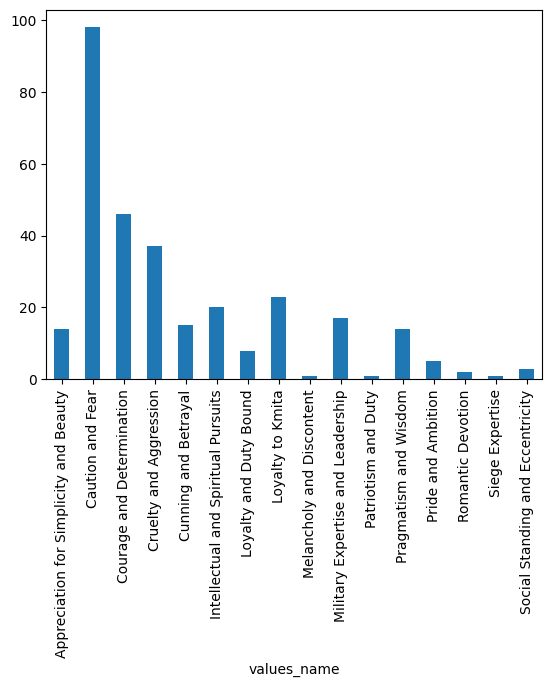

In [ ]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_characters_enriched")
characters_count_by = (characters.groupby("sex")["sex"].count())
characters_count_by.plot.bar()

d:\llm\book_crawler\.venv\Lib\site-packages\bigframes\core\log_adapter.py:180: TimeTravelCacheWarning: Reading cached table from 2025-09-20 15:47:16.268543+00:00 to avoid
incompatibilies with previous reads of this table. To read the latest
version, set `use_cache=False` or close the current session with
Session.close() or bigframes.pandas.close_session().
  return method(*args, **kwargs)


<Axes: xlabel='wealth_name'>

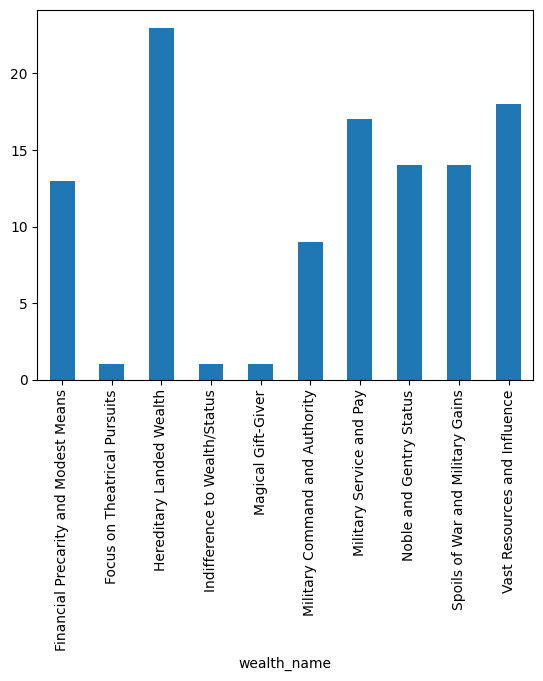

In [14]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_characters_enriched")
characters_count_by = (characters.groupby("wealth_name")["wealth_name"].count())
characters_count_by.plot.bar()

d:\llm\book_crawler\.venv\Lib\site-packages\bigframes\core\log_adapter.py:180: TimeTravelCacheWarning: Reading cached table from 2025-09-20 15:47:16.268543+00:00 to avoid
incompatibilies with previous reads of this table. To read the latest
version, set `use_cache=False` or close the current session with
Session.close() or bigframes.pandas.close_session().
  return method(*args, **kwargs)


<Axes: xlabel='social_class_name'>

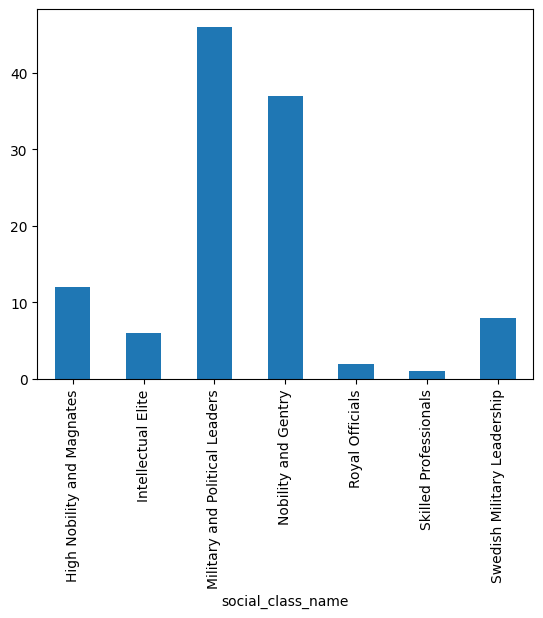

In [13]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_characters_enriched")
characters_count_by = (characters.groupby("social_class_name")["social_class_name"].count())
characters_count_by.plot.bar()

d:\llm\book_crawler\.venv\Lib\site-packages\bigframes\core\log_adapter.py:180: TimeTravelCacheWarning: Reading cached table from 2025-09-20 15:47:16.268543+00:00 to avoid
incompatibilies with previous reads of this table. To read the latest
version, set `use_cache=False` or close the current session with
Session.close() or bigframes.pandas.close_session().
  return method(*args, **kwargs)


<Axes: xlabel='values_name'>

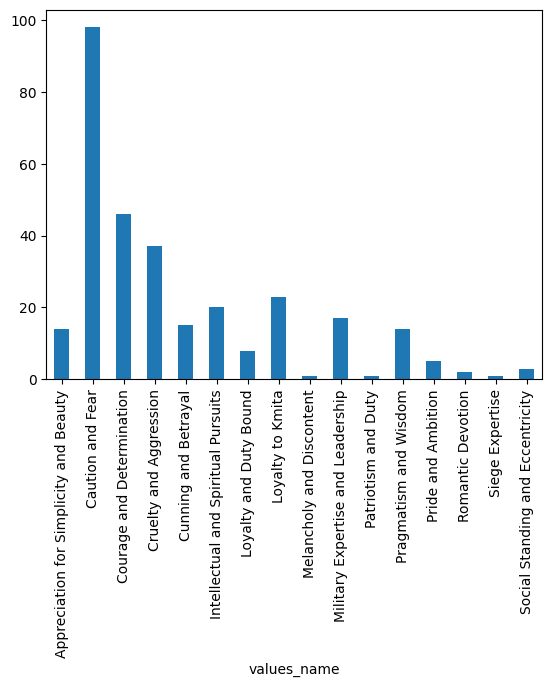

In [ ]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_characters_enriched")
characters_count_by = (characters.groupby("values_name")["values_name"].count())
characters_count_by.plot.bar()

d:\llm\book_crawler\.venv\Lib\site-packages\bigframes\core\log_adapter.py:180: TimeTravelCacheWarning: Reading cached table from 2025-09-21 00:16:06.383027+00:00 to avoid
incompatibilies with previous reads of this table. To read the latest
version, set `use_cache=False` or close the current session with
Session.close() or bigframes.pandas.close_session().
  return method(*args, **kwargs)


<Axes: xlabel='wealth_name'>

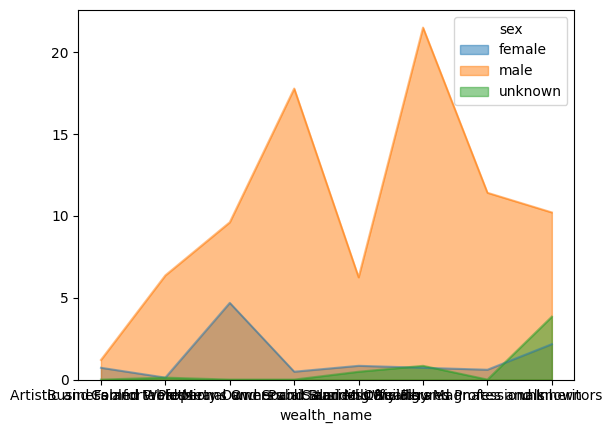

In [ ]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_crosstab_sex_wealth")
characters = characters[(characters['sex'] != 'unknown') & (characters['wealth_name'] != 'unknown')]
pivot_df = characters.pivot(index='wealth_name', columns='sex', values='total_percentage')

#name_counts = (usa_names[usa_names["name"].isin(("Mary", "Emily", "Lisa"))].groupby(("year", "name"))["number"].sum())

# Flatten the index of the dataframe so that the counts for each name has their own columns.
#name_counts = name_counts.unstack(level=1).fillna(0)

pivot_df.plot.area(stacked=False, alpha=0.5)